In [17]:
import json
import pathlib
from matplotlib import pyplot as plt
from random import randint
import pandas as pd

In [18]:
dirpath = './test2/'

In [19]:
def read_json(name: str):
    json_open = open(dirpath+name, 'r')
    json_load = json.load(json_open)
    #print(json_load)
    return json_load

In [20]:
def get_filenames():
    filenames = []
    p_temp = pathlib.Path(dirpath).glob('*.json')
    for p in p_temp:
        filenames.append(p.name)
    return filenames

In [21]:
def data_generator():
    data =pd.DataFrame([], index=[], columns=["time", "S", "I", "R"])
    filenames = get_filenames()
    for name in filenames:
        json_data = read_json(name)
        for step_data in json_data:
            #print([step_data["time"], step_data["susceptible"], step_data["infected"], step_data["recovered"]])
            data = data.append({"time": step_data["time"], "S": step_data["susceptible"],  "I": step_data["infected"],  "R": step_data["recovered"]}, ignore_index=True)
            
    df_after = data.groupby('time').apply(lambda x: x.sum()).drop('time',axis=1)
    return df_after

758.0 0.7335092348284961 Int64Index([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
            ...
            192, 193, 194, 195, 196, 197, 198, 199, 200, 201],
           dtype='int64', name='time', length=172)
                S             I    R
0    76000.000000  23361.477573  0.0
1    75498.680739  23562.005277  0.0
2    74796.833773  24163.588391  0.0
3    73794.195251  25065.963061  0.0
4    73393.139842  25366.754617  0.0
..            ...           ...  ...
167  35493.403694  55145.118734  0.0
168  35393.139842  55245.382586  0.0
169  35292.875989  55345.646438  0.0
170  35092.348285  55445.910290  0.0
171  34791.556728  55746.701847  0.0

[172 rows x 3 columns]


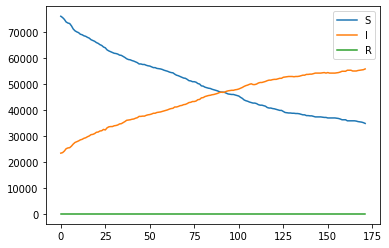

In [48]:
data = data_generator()

data = data[30:] # データ調整
smax = data["S"].max()
smin = data["S"].min()
imax = data["I"].max()
imin = data["I"].min()
sirate = imax/smax

print(smax, sirate, data.index)
data["I"] = data["I"].apply(lambda x: x/rmax * 76000*sirate)
data["S"] = data["S"].apply(lambda x: x/smax * 76000)
data = data.reset_index().drop("time", axis=1)
print(data)
data.plot()